### Brief Introduction

##### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

##### We have received a Survey data which covers a lots of informations about the Bike Sharing Deamnd and associated factors across US

### Business Objective

1. Prepare a Model using the survey data.
2. Model will be used to analyze factors that affects Bakie Sharing Demand.
3. Business will take help of this Model to plan the activites to manage Future Demands.


### Importing Dependencis & Libraries

In [48]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

### Import dataset and analysis of it

In [49]:
# Load and read file
df = pd.read_csv("day.csv", header=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Check the Shape of data

In [50]:
df.shape

(730, 16)

### Data Cleaning

#### 1- Check for Null Values

In [51]:
# snull function have details about number of null values in each columns
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

###### Based on analysis no null values exists

<h3> Remove Unused Columns </h3>
<p> Casual and Registered Columns are of no use as CNT column shows sums of 'Casual' and 'Registered' Columns.</p>

In [52]:
df.drop(['casual', 'registered'], axis=1, inplace=True)

<p>dteday Column is not needed there is Year and Month Column exists</p>

In [53]:
df.drop(['dteday'], axis=1, inplace=True)

<p>temp and atemp both represent temperature. now check for both are corelated or not ?</p>

In [54]:
temp_atemp_corr = df['temp'].corr(df['atemp'])
temp_atemp_corr

0.9916961786905648

<p>teamp and atemp are highly correlated to each other and will leads to multicolinearity.</br>
To avoid this we are dropping atemp column <p>

In [55]:
df.drop(['atemp'], axis=1, inplace=True)

<p>Removing <b>instant</b> column as well as it represnt only data row no. It won't add any value to data analysis or model building</p>

In [56]:
df.drop(['instant'], axis=1, inplace=True)

###### holiday : weather day is a holiday or not
###### workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
###### holiday column here is not adding any value as it is already covered in workingday column value
###### Removing holiday column as well.

In [57]:
df.drop(['holiday'], axis=1, inplace=True)

In [58]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600


### Check for data Type Analysis & Conversion

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


### EDA - Visualization

<b> Visualization for Numerical Columns </b>

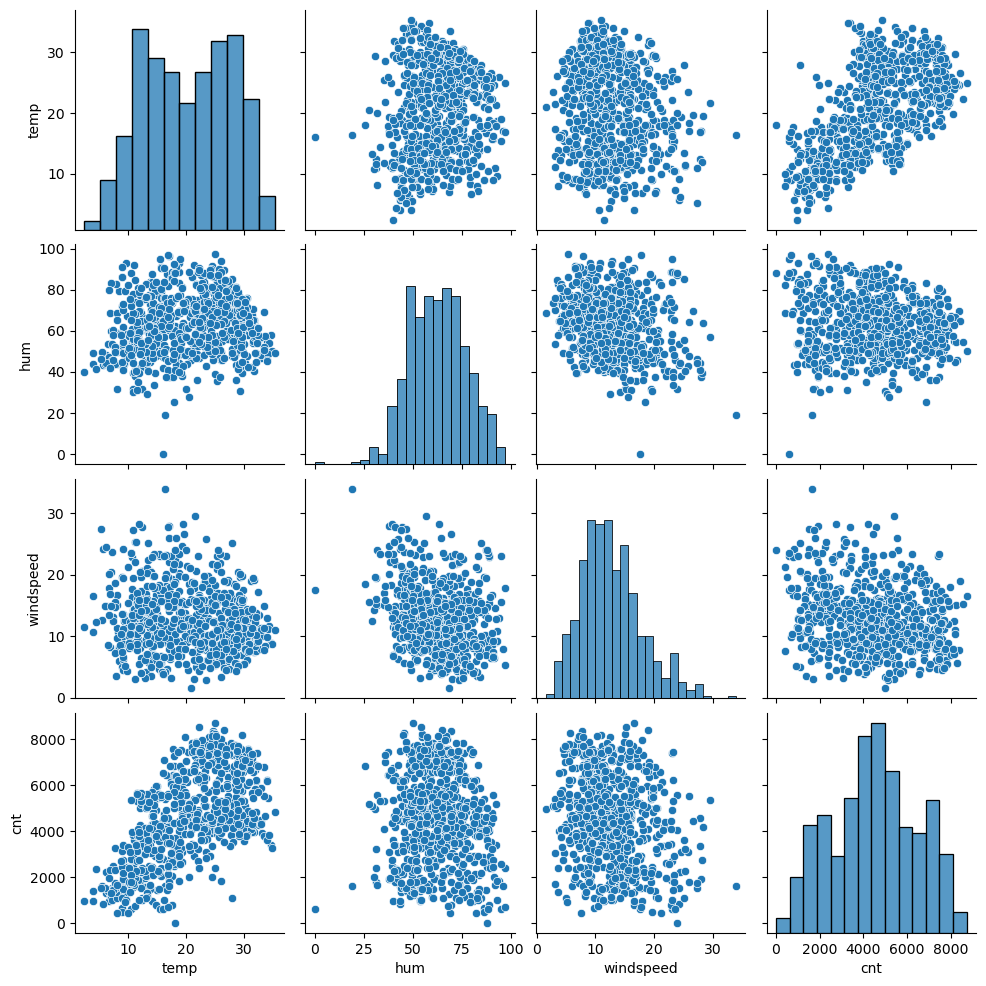

In [60]:
# Check numerical values to observe if there is any linear relatonship among numerical attributes or not
# taking only numeric columns. There are column are categorical but having numeric category like weekday or holiday
sns.pairplot(df, vars=['temp','hum','windspeed','cnt'])
plt.show()

<b>Visualization for Categorical Columns </b>

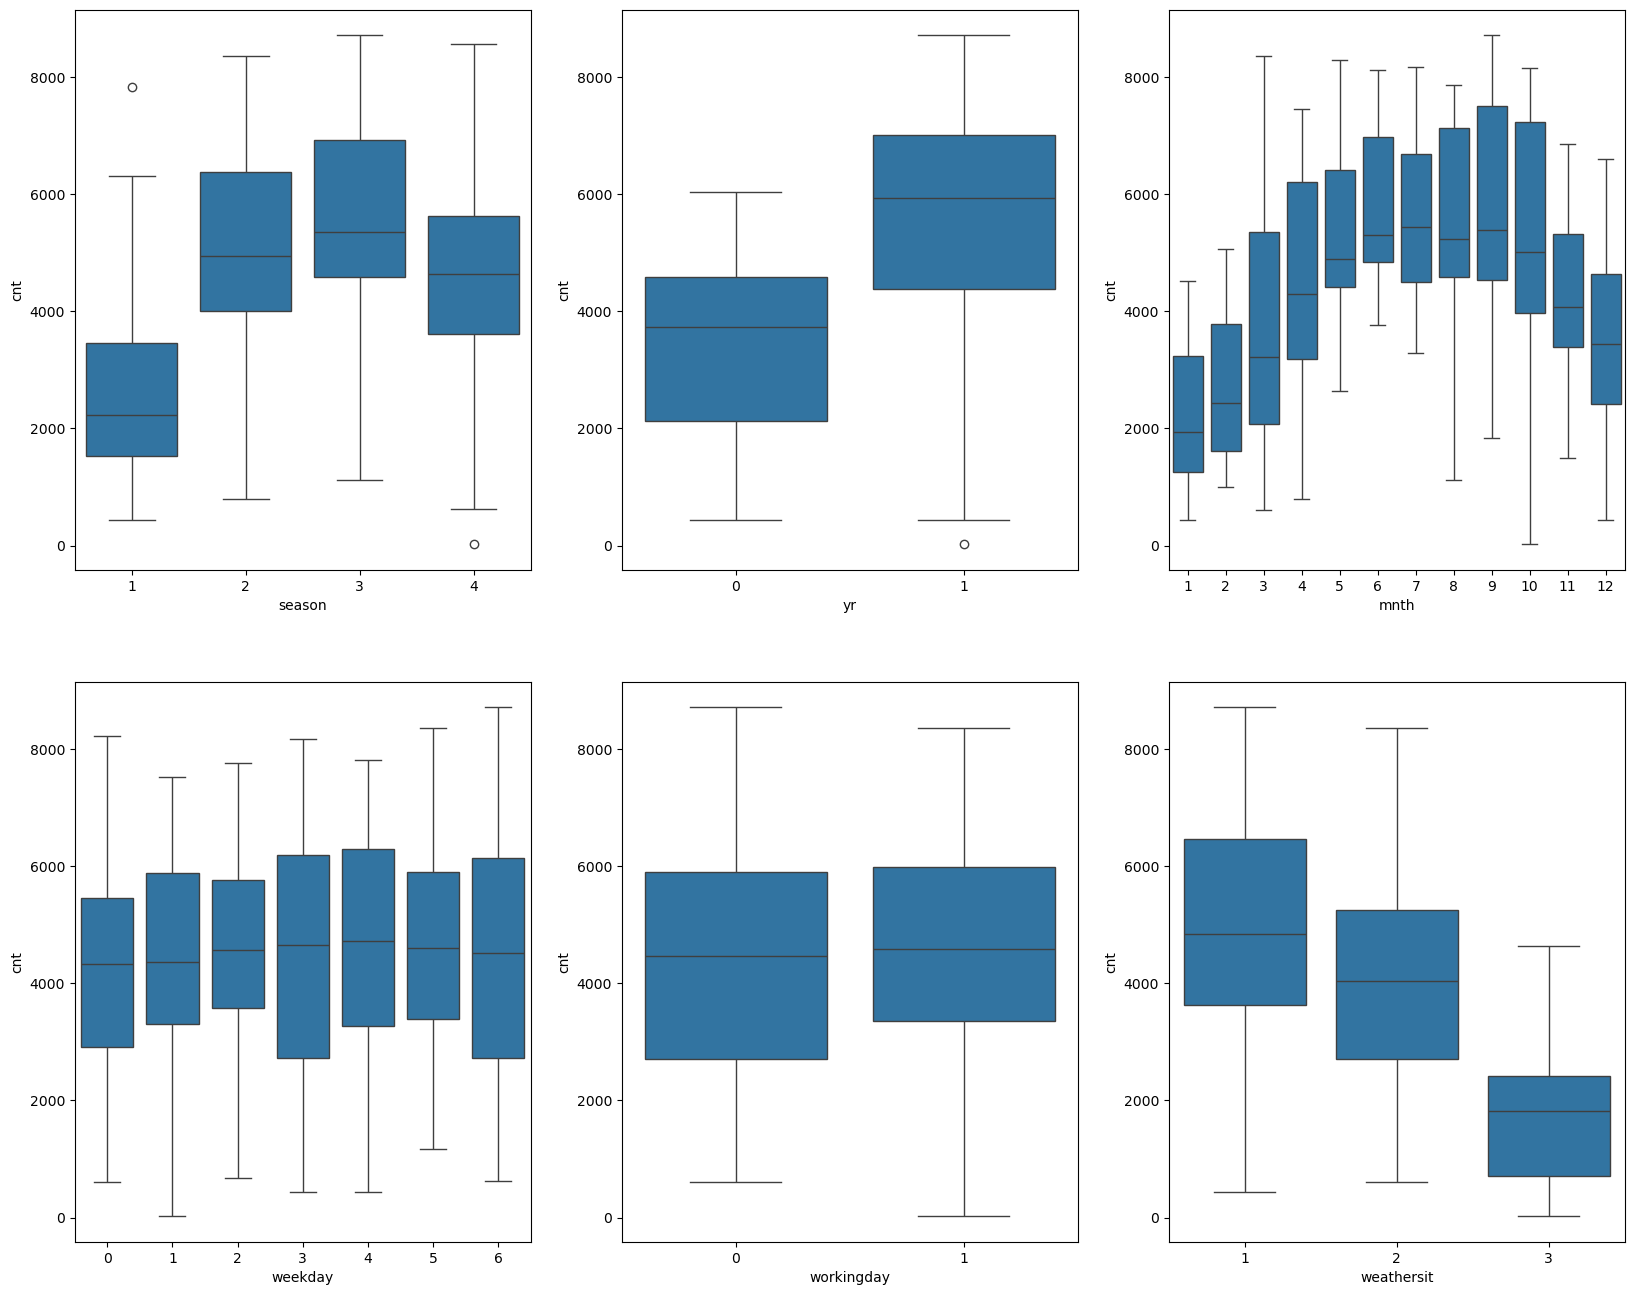

In [61]:
#visualization for categorical attributes
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(x="season", y="cnt", data=df)

plt.subplot(2,3,2)
sns.boxplot(x="yr", y="cnt", data=df)

plt.subplot(2,3,3)
sns.boxplot(x="mnth", y="cnt", data=df)

plt.subplot(2,3,4)
sns.boxplot(x="weekday", y="cnt", data=df)

plt.subplot(2,3,5)
sns.boxplot(x="workingday", y="cnt", data=df)

plt.subplot(2,3,6)
sns.boxplot(x="weathersit", y="cnt", data=df)

plt.show()

<h4> Observation</h4>
<ol>
    <li> Demand for Bikes is highest in the Month of September and October, Janurary and February has least demand</li>
    <li> Demand for Bikes is highest in the Fall, Spring Season is having lowest demand</li>
    <li> As BoomBikes started thier setup in 2018 and there is visible increase in demand in 2019 as compare to 2018</li>
</ol>

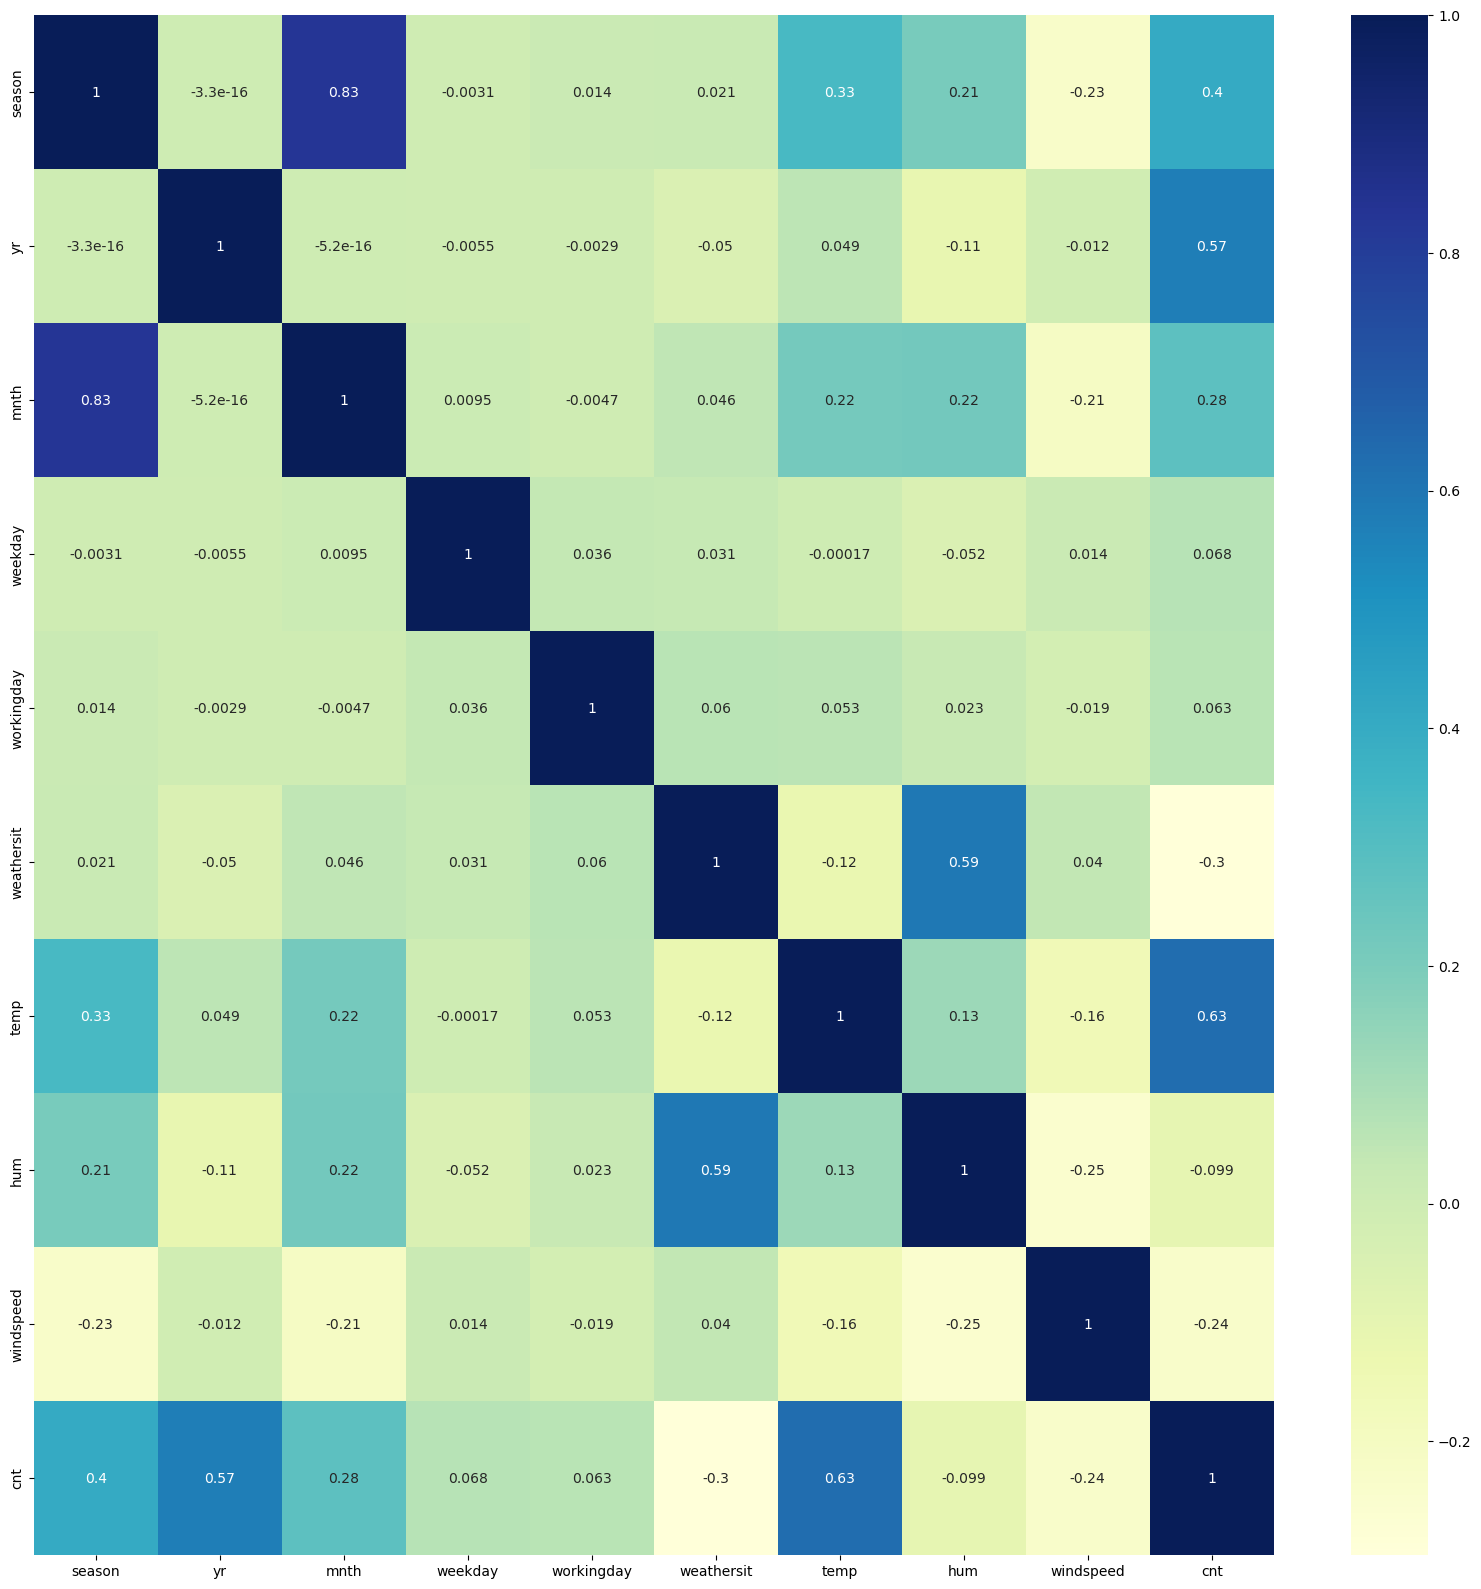

In [62]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr() , annot=True , cmap = 'YlGnBu')
plt.show()

<h3>Modeling - Data Prepration</h3>
<p>Encoding:</p>
<ol>
<li>Check is Binary categorical column is having values as 0 and 1 only</li>
<li>Creating Dummy Variables where categorical columns having unique values greater than 2</li>
</ol>

<p><b>Binary Value Columns</b></br>
<b>WorkingDay</b> having values as '0' and '1' only.

<p><h4>Categorical Columns having Unique values greater than 2 </h4> </p>
<p><b>Season</b>, <b>Month</b> <b>weekday</b> and <b>WeatherSit</b> Columns need correct data value Mapping.</p>
<p><b>Year</b> column also need to have values as 2018 and 2019 instead of 0 and 1 so that we can create proper dummy column later.</p>

In [63]:
# Adding actual Value of Season Column
df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,1,6,0,2,14.110847,80.5833,10.749882,985
1,Spring,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,Spring,0,1,1,1,1,8.050924,43.7273,16.636703,1349
3,Spring,0,1,2,1,1,8.200000,59.0435,10.739832,1562
4,Spring,0,1,3,1,1,9.305237,43.6957,12.522300,1600


In [64]:
# providing Value of Month Column starting from 1 to 12
df.mnth = df.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr' , 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,6,0,2,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,0,2,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,1,1,1,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,2,1,1,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,3,1,1,9.305237,43.6957,12.522300,1600


In [65]:
df.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [66]:
# Adding actual Value of weekday Column
df.weekday = df.weekday.map({6:'Monday', 0:'Tuesday', 1:'Wednesday', 2:'Thursday' , 3:'Friday', 4:'Saturday', 5:'Sunday'})
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,Monday,0,2,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,Tuesday,0,2,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,Wednesday,1,1,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,Thursday,1,1,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,Friday,1,1,9.305237,43.6957,12.522300,1600


In [67]:
# Adding actual Value of Weathersit Column
df.weathersit = df.weathersit.map({1:'Clear', 2:'Mist', 3:'Light_Snow', 4:'Heavy_Rain'})
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,Monday,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,Tuesday,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600


<h4>Creating Dummy Variable for Categorical Values which is having unique values greater than 2</h4>

In [68]:
# Creating Dummy for season column
dummy_Season = pd.get_dummies(df['season'], drop_first = True)

In [69]:
# Creating Dummy for Month column
dummy_Month = pd.get_dummies(df['mnth'], drop_first = True)

In [70]:
# Creating Dummy for Weekday column
dummy_Weekday = pd.get_dummies(df['weekday'], drop_first = True)

In [71]:
# Creating Dummy for weathersit column
dummy_WeatherSituation = pd.get_dummies(df['weathersit'], drop_first = True)

<h4> Concatinating Dummy Columns in the actual data</h4>

In [72]:
df = pd.concat([df , dummy_Season] , axis=1)
df = pd.concat([df , dummy_Month] , axis=1)
df = pd.concat([df , dummy_Weekday] , axis=1)
df = pd.concat([df , dummy_WeatherSituation] , axis=1)

In [73]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
0,Spring,0,Jan,Monday,0,Mist,14.110847,80.5833,10.749882,985,...,False,False,True,False,False,False,False,False,False,True
1,Spring,0,Jan,Tuesday,0,Mist,14.902598,69.6087,16.652113,801,...,False,False,False,False,False,False,True,False,False,True
2,Spring,0,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,...,False,False,False,False,False,False,False,True,False,False
3,Spring,0,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,...,False,False,False,False,False,True,False,False,False,False
4,Spring,0,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600,...,False,False,False,False,False,False,False,False,False,False


<h4> Dropping Original Columns for which Dummy Columns Created<h4>

In [74]:
df.drop(["season" , "mnth" , "weekday" , "weathersit"], inplace=True, axis=1)

In [75]:
df.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
0,0,0,14.110847,80.5833,10.749882,985,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,14.902598,69.6087,16.652113,801,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,0,1,8.050924,43.7273,16.636703,1349,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,1,8.200000,59.0435,10.739832,1562,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,1,9.305237,43.6957,12.522300,1600,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   hum         730 non-null    float64
 4   windspeed   730 non-null    float64
 5   cnt         730 non-null    int64  
 6   Spring      730 non-null    bool   
 7   Summer      730 non-null    bool   
 8   Winter      730 non-null    bool   
 9   Aug         730 non-null    bool   
 10  Dec         730 non-null    bool   
 11  Feb         730 non-null    bool   
 12  Jan         730 non-null    bool   
 13  Jul         730 non-null    bool   
 14  Jun         730 non-null    bool   
 15  Mar         730 non-null    bool   
 16  May         730 non-null    bool   
 17  Nov         730 non-null    bool   
 18  Oct         730 non-null    bool   
 19  Sep         730 non-null    b

In [77]:
df.Feb.value_counts()

Feb
False    674
True      56
Name: count, dtype: int64

<h3>Steps for Model Training</h3>

<b>1- Break the Dataset into Training data and Test Data</b>

In [78]:
# Split Data into Train and Test
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [79]:
df_train.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
576,1,1,29.246653,70.4167,11.083475,7216,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
426,1,0,16.980847,62.1250,10.792293,4066,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
728,1,0,10.489153,48.3333,23.500518,1796,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
482,1,0,15.443347,48.9583,8.708325,4220,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
111,0,1,13.803347,72.9583,14.707907,1683,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [80]:
df_test.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
184,0,0,29.793347,63.7917,5.459106,6043,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
535,1,1,32.082500,59.2083,7.625404,6211,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
299,0,1,19.270000,81.2917,13.250121,2659,False,False,True,False,...,True,False,False,True,False,False,False,False,False,True
221,0,1,31.433347,42.4167,13.417286,4780,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
152,0,1,29.315000,30.5000,19.583229,4968,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


<b>2 - Scaling on Training Data Set</b>

In [81]:
# Scaling data using MinMax Approach

# first create object of min/Max Scaler class
scaler = MinMaxScaler()

# Now rescale only numerical columns and not the binary columns
num_var = ['temp', 'hum', 'windspeed', 'cnt']

# Now it and transform given variable
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
576,1,1,0.815169,0.725633,0.264686,0.827658,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
426,1,0,0.442393,0.640189,0.255342,0.465255,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
728,1,0,0.245101,0.498067,0.663106,0.204096,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
482,1,0,0.395666,0.504508,0.188475,0.482973,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
111,0,1,0.345824,0.751824,0.380981,0.191095,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [82]:
df_train.describe()

,yr,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.500429,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,1.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b>Splitting Training Dataset into X_Train and Y_Train Data</b>

In [83]:
# Now let's create X and y train sets

# cut price column and assign to X_train
y_train = df_train.pop('cnt') 
X_train = df_train

In [84]:
X_train.head()

,yr,workingday,temp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
576,1,1,0.815169,0.725633,0.264686,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
426,1,0,0.442393,0.640189,0.255342,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
728,1,0,0.245101,0.498067,0.663106,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
482,1,0,0.395666,0.504508,0.188475,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
111,0,1,0.345824,0.751824,0.380981,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [85]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

<b>3-Building Model</b>

#### Let's use LinearRegression Function from Scikit

In [86]:
# import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [87]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [88]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
#rfe.support_ shows whether feature is important or not, rfe.ranking_ shows significance - 1 is highest

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 12),
 ('Sunday', False, 9),
 ('Thursday', False, 8),
 ('Tuesday', True, 1),
 ('Wednesday', False, 7),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

In [89]:
# Let's now pick all those columns where rfe.support_ is True
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Jan', 'Jul', 'Sep', 'Monday', 'Tuesday', 'Light_Snow',
       'Mist'],
      dtype='object')

<b>Building Model using StatsModel for better statistical Analysis</b>

In [90]:
#building a X_train dataset with applicable columns only
X_train_rfe = X_train[col]

In [91]:
#Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [92]:
lm = sm.OLS(y_train, X_train_rfe).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          4.22e-191
Time:                        19:03:54   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1937      0.042      4.563      0.000       0.110       0.277
yr             0.2305      0.008     28.795      0.000       0.215       0.246
workingday     0.1015      0.025      4.011      0.000       0.052       0.151
temp           0.5096      0.034     14.837      0.000       0.442       0.577
hum           -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Spring        -0.0509      0.021     -2.464      0.014      -0.091      -0.010
Summer         0.0508      0.015      3.423      0.001       0.022       0.080
Winter         0.0933      0.017      5.403      0.000       0.059       0.127
Jan           -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul           -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep            0.0814      0.016      4.945      0.000       0.049       0.114
Monday         0.1117      0.027      4.179      0.000       0.059       0.164
Tuesday        0.0582      0.027      2.164      0.031       0.005       0.111
Light_Snow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist          -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_train_vif = X_train_rfe.drop('const', axis=1)

# Now create a dataframe which will have all feature names with VIF values
vif = pd.DataFrame()
vif['features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
3,hum,32.78
2,temp,19.98
1,workingday,18.57
5,Spring,5.04
11,Monday,4.95
4,windspeed,4.92
12,Tuesday,4.79
7,Winter,3.74
6,Summer,3.05
14,Mist,2.31


In [ ]:
# hum is having VIF value as 32.78 which is more than 5 so we can remove

X_train_new = X_train_rfe.drop('hum', axis=1)

In [ ]:
X_train_new.head()

,const,yr,workingday,temp,windspeed,Spring,Summer,Winter,Jan,Jul,Sep,Monday,Tuesday,Light_Snow,Mist
576,1.0,1,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,1,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,1,0,0,1
111,1.0,0,1,0.345824,0.380981,0,1,0,0,0,0,0,0,0,1


In [ ]:
#Adding constant
lm = sm.OLS(y_train, X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.60e-188
Time:                        19:07:11   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1179      0.039      3.020      0.003       0.041       0.195
yr             0.2345      0.008     29.009      0.000       0.219       0.250
workingday     0.1021      0.026      3.971      0.000       0.052       0.153
temp           0.4722      0.034     14.005      0.000       0.406       0.538
windspeed     -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Spring        -0.0599      0.021     -2.867      0.004      -0.101      -0.019
Summer         0.0445      0.015      2.967      0.003       0.015       0.074
Winter         0.0784      0.017      4.562      0.000       0.045       0.112
Jan           -0.0392      0.018     -2.227      0.026      -0.074      -0.005
Jul           -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep            0.0755      0.017      4.527      0.000       0.043       0.108
Monday         0.1141      0.027      4.198      0.000       0.061       0.167
Tuesday        0.0558      0.027      2.042      0.042       0.002       0.109
Light_Snow    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Mist          -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> VIF Evaluation of the Model </b>

In [ ]:
X_train_vif = X_train_new.drop('const', axis=1)

# Now create a new dataframe  that contain all feature names and their VIF values
vif = pd.DataFrame()
vif['features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,workingday,16.56
2,temp,13.13
3,windspeed,4.79
10,Monday,4.54
11,Tuesday,4.28
4,Spring,4.22
6,Winter,2.79
5,Summer,2.76
0,yr,2.08
7,Jan,1.65


<b> Here we see workingday is having very high value of VIF so Let's remove it</b>

In [ ]:
X_train_rfe.head()

,const,yr,workingday,temp,hum,windspeed,Spring,Summer,Winter,Jan,Jul,Sep,Monday,Tuesday,Light_Snow,Mist
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,0,1
111,1.0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [ ]:
# workingday is having VIF as 16.56 which is more than 5 so lets remove 
X_train_new = X_train_rfe.drop(['hum','workingday'], axis=1)

In [ ]:
lm = sm.OLS(y_train, X_train_new).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          2.52e-186
Time:                        19:09:55   Log-Likelihood:                 502.75
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2171      0.030      7.130      0.000       0.157       0.277
yr             0.2350      0.008     28.650      0.000       0.219       0.251
temp           0.4731      0.034     13.827      0.000       0.406       0.540
windspeed     -0.1586      0.025     -6.289      0.000      -0.208      -0.109
Spring        -0.0623      0.021     -2.942      0.003      -0.104      -0.021
Summer         0.0448      0.015      2.945      0.003       0.015       0.075
Winter         0.0753      0.017      4.324      0.000       0.041       0.109
Jan           -0.0401      0.018     -2.244      0.025      -0.075      -0.005
Jul           -0.0470      0.019     -2.530      0.012      -0.084      -0.011
Sep            0.0719      0.017      4.255      0.000       0.039       0.105
Monday         0.0159      0.011      1.390      0.165      -0.007       0.038
Tuesday       -0.0424      0.012     -3.585      0.000      -0.066      -0.019
Light_Snow    -0.2862      0.025    -11.628      0.000      -0.335      -0.238
Mist          -0.0793      0.009     -9.094      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.992
Skew:                          -0.805   Prob(JB):                     3.41e-47
Kurtosis:                       5.734   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_train_vif = X_train_new.drop('const', axis=1)

# Now let's create a dataframe which will have all feature names and their VIF values
vif = pd.DataFrame()
vif['features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,temp,5.22
2,windspeed,4.64
3,Spring,2.78
4,Summer,2.25
0,yr,2.07
5,Winter,1.82
6,Jan,1.61
7,Jul,1.60
12,Mist,1.56
8,Sep,1.33


</b>Humidity (hum) is having very high value of VIF. Let's remove it</b>

In [ ]:
#Monday is having p-value as 0.165 which is more than 0.05 so lets remove it along with humidity and workingday

X_train_new = X_train_rfe.drop(['hum','workingday','Monday'], axis=1)

In [ ]:
#Adding constant
lm = sm.OLS(y_train, X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          4.42e-187
Time:                        19:11:48   Log-Likelihood:                 501.76
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     497   BIC:                            -922.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2201      0.030      7.242      0.000       0.160       0.280
yr             0.2346      0.008     28.595      0.000       0.218       0.251
temp           0.4720      0.034     13.787      0.000       0.405       0.539
windspeed     -0.1570      0.025     -6.226      0.000      -0.207      -0.107
Spring        -0.0625      0.021     -2.946      0.003      -0.104      -0.021
Summer         0.0447      0.015      2.931      0.004       0.015       0.075
Winter         0.0755      0.017      4.333      0.000       0.041       0.110
Jan           -0.0399      0.018     -2.233      0.026      -0.075      -0.005
Jul           -0.0465      0.019     -2.498      0.013      -0.083      -0.010
Sep            0.0719      0.017      4.251      0.000       0.039       0.105
Tuesday       -0.0453      0.012     -3.888      0.000      -0.068      -0.022
Light_Snow    -0.2860      0.025    -11.610      0.000      -0.334      -0.238
Mist          -0.0793      0.009     -9.085      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       77.484   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.086
Skew:                          -0.747   Prob(JB):                     2.40e-46
Kurtosis:                       5.767   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_train_vif = X_train_new.drop('const', axis=1)

#let's create a dataframe which will have all feature names and their VIF values
vif = pd.DataFrame()
vif['features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,temp,5.18
2,windspeed,4.62
3,Spring,2.76
4,Summer,2.24
0,yr,2.07
5,Winter,1.80
6,Jan,1.61
7,Jul,1.59
11,Mist,1.56
8,Sep,1.33


In [ ]:
#temp is having VIF as 5.18 which is more than 5 so lets remove it along with humidity, Monday and workingday
X_train_new = X_train_rfe.drop(['hum','workingday','Monday','temp'], axis=1)

In [ ]:
#Adding constant
lm = sm.OLS(y_train, X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          2.12e-153
Time:                        19:14:10   Log-Likelihood:                 419.17
No. Observations:                 510   AIC:                            -814.3
Df Residuals:                     498   BIC:                            -763.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5916      0.017     35.824      0.000       0.559       0.624
yr             0.2480      0.010     25.919      0.000       0.229       0.267
windspeed     -0.1889      0.029     -6.406      0.000      -0.247      -0.131
Spring        -0.2628      0.018    -14.492      0.000      -0.298      -0.227
Summer        -0.0425      0.016     -2.612      0.009      -0.075      -0.011
Winter        -0.0792      0.016     -5.055      0.000      -0.110      -0.048
Jan           -0.1034      0.020     -5.097      0.000      -0.143      -0.064
Jul           -0.0082      0.022     -0.380      0.704      -0.051       0.034
Sep            0.0674      0.020      3.392      0.001       0.028       0.106
Tuesday       -0.0460      0.014     -3.364      0.001      -0.073      -0.019
Light_Snow    -0.2985      0.029    -10.325      0.000      -0.355      -0.242
Mist          -0.0862      0.010     -8.417      0.000      -0.106      -0.066
==============================================================================
Omnibus:                       44.391   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.250
Skew:                          -0.480   Prob(JB):                     2.81e-22
Kurtosis:                       4.936   Cond. No.                         9.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_train_vif = X_train_new.drop('const', axis=1)

# Now let's create a dataframe which will have all feature names and their VIF values
vif = pd.DataFrame()
vif['features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,windspeed,3.86
2,Spring,2.76
3,Summer,2.04
0,yr,1.84
4,Winter,1.76
5,Jan,1.60
10,Mist,1.52
6,Jul,1.21
8,Tuesday,1.16
7,Sep,1.15


In [ ]:
# Jul is having p-value as 0.704 which is more than 0.05 so lets remove it along with humidity, Monday, temp and workingday
X_train_new = X_train_rfe.drop(['hum','workingday','Monday','temp','Jul'], axis=1)

In [ ]:
#Adding constant
lm = sm.OLS(y_train, X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     171.7
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.69e-154
Time:                        19:16:53   Log-Likelihood:                 419.10
No. Observations:                 510   AIC:                            -816.2
Df Residuals:                     499   BIC:                            -769.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5886      0.014     40.683      0.000       0.560       0.617
yr             0.2481      0.010     25.945      0.000       0.229       0.267
windspeed     -0.1889      0.029     -6.409      0.000      -0.247      -0.131
Spring        -0.2599      0.016    -15.846      0.000      -0.292      -0.228
Summer        -0.0396      0.014     -2.759      0.006      -0.068      -0.011
Winter        -0.0764      0.014     -5.513      0.000      -0.104      -0.049
Jan           -0.1034      0.020     -5.104      0.000      -0.143      -0.064
Sep            0.0697      0.019      3.685      0.000       0.033       0.107
Tuesday       -0.0462      0.014     -3.384      0.001      -0.073      -0.019
Light_Snow    -0.2986      0.029    -10.338      0.000      -0.355      -0.242
Mist          -0.0859      0.010     -8.418      0.000      -0.106      -0.066
==============================================================================
Omnibus:                       44.484   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.980
Skew:                          -0.483   Prob(JB):                     3.21e-22
Kurtosis:                       4.930   Cond. No.                         8.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_train_vif = X_train_new.drop('const', axis=1)

#let's create a dataframe which will have all feature names and their VIF values
vif = pd.DataFrame()
vif['features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,windspeed,3.52
2,Spring,2.58
3,Summer,1.87
0,yr,1.78
4,Winter,1.64
5,Jan,1.59
9,Mist,1.52
7,Tuesday,1.15
6,Sep,1.13
8,Light_Snow,1.08


<h3>Let's make Prediction on Training Dataset</h3>

In [ ]:
y_train_pred = lm.predict(X_train_new)

<b> Let's calculate Residual</b>

In [ ]:
res = y_train - y_train_pred

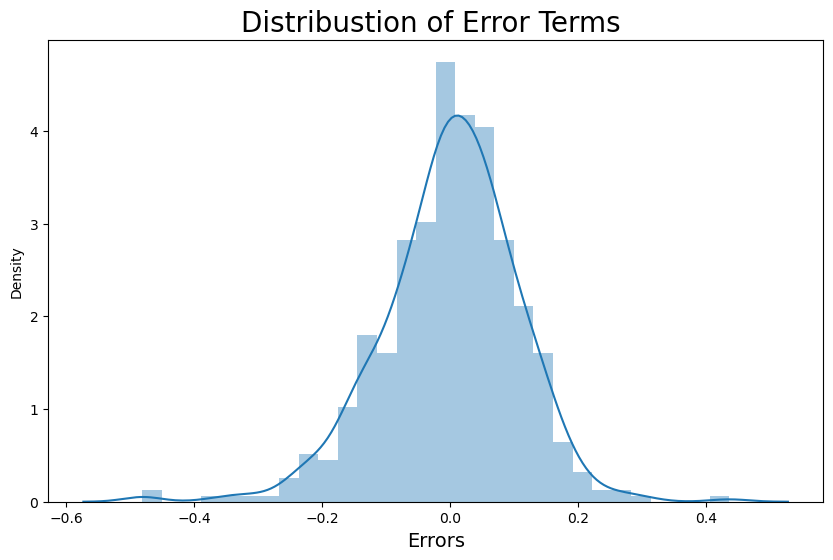

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(res , norm_hist=True)
plt.xlabel('Errors', fontsize = 14)  
plt.title('Distribustion of Error Terms ',fontdict={'fontsize' : 20 , 'color' : "Black" }) 
plt.show()

In [ ]:
#Calculating R-Square
r2_score(y_true=y_train, y_pred=y_train_pred)

0.774845758063631

<h3>Prepare Test DataSet for Prediction</h3>

<b>1- Scaling</b>

In [ ]:
#Scaling test data numerical columns
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
184,0,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_test.describe()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.027273,0.318182
std,0.500809,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.163248,0.466833
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b>2-Prepare X_test and y_test datasets</b>

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
X_test_new = X_test[col]

In [ ]:
# Let's drop all columns which we have droped during Model Feature Selection Process
X_test_new = X_test_new.drop(['hum','workingday','Monday','temp','Jul'], axis=1)

In [ ]:
#Add Constant
X_test_new = sm.add_constant(X_test_new)

In [ ]:
X_test_new.head()

,const,yr,windspeed,Spring,Summer,Winter,Jan,Sep,Tuesday,Light_Snow,Mist
184,1.0,0,0.084219,0,0,0,0,0,0,0,1
535,1.0,1,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,0.334206,0,0,1,0,0,0,0,1
221,1.0,0,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0.537414,0,1,0,0,0,0,0,0


In [ ]:
#predicting Y for test dataset
y_test_pred = lm.predict(X_test_new)

In [ ]:
#Calculating R-Square
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7402329273923063

<h3> R2 (R-Square Values) </h3>
<h4> R2 for Training Dataset is 77.4</h4>
<h4> R2 for Test Dataset is 74.0</h4>

<h3>Model Equation </h3>

###### count= 0.5886+(0.2481*yr)-(0.1889*windspeed)-(0.2599*Spring)-(0.0396*Summer)-(0.0764*Winter)-(0.1034*Jan)+(0.0697*Sep)-(0.0462*Tuesday)-(0.2986*Light_Snow)-(0.0859*Mist)

##### 1. Year shows a strong correlation with Count, which is logical as the data indicates year-over-year growth in bike demand.
##### 2. September exhibits peak demand for shared bikes, highlighting its high popularity.
##### 3. Negative coefficients are observed for independent variables such as windspeed, spring, summer, winter, January, Tuesday, and conditions like light snow and mist. This suggests a decline in bike demand when these variables increase.